# How important is for an Airbnb listing to be close to the beach in Sydney?
## by Pietro Pollo

## Table of Contents
- [Overview](#intro)
- [Data gathering](#gather)
- [Data assessment](#assess)
- [Data wrangling](#wrangle)
- [Analysis](#analysis)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option("display.max_columns", None)

<a id='intro'></a>
## Overview

Here I analyze data from Airbnb listings in Sydney from 7 Dec 2018 to 6 Dec 2019. First I assessed which neighborhoods use the word "beach" most often in their listing description and whether these listing have different characteristics (e.g. number of bedrooms). Then, I focused in understand how being close to the beach relates to price and availability of listings.

<a id='gather'></a>
## Data gathering

Datasets retrieved from https://www.kaggle.com/tylerx/sydney-airbnb-open-data. Dictionary can be found here (https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=982310896), made by http://insideairbnb.com/.

Two files used: 
- listings is a csv file with Airbnb listings in Sydney from 7 Dec 2018 to 6 Dec 2019
- calendar is a csv file with the calendar availability from Airbnb listings in Sydney from 7 Dec 2018 to 6 Dec 2019

In [2]:
listings = pd.read_csv('listings_dec18.csv')
calendar = pd.read_csv('calendar_dec18.csv')

C:\Users\pietr\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (43,61,62,87) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<a id='assess'></a>
## Data assessment

Listings dataframe has many columns I am not interested in. Column 'price' is a string and should be of type numeric, and some values for 'bedrooms' and 'description' are null.

In [3]:
#listings
listings.head()
listings.shape
listings.info()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12351,https://www.airbnb.com/rooms/12351,20181207034750,2018-12-07,Sydney City & Harbour at the door,Come stay with Vinh & Stuart (Awarded as one o...,"We're pretty relaxed hosts, and we fully appre...",Come stay with Vinh & Stuart (Awarded as one o...,none,"Pyrmont is an inner-city village of Sydney, on...",We've a few reasons for the 6.00pm arrival tim...,Our home is centrally located and an easy walk...,We look forward to welcoming you just as we wo...,As much or as little as you like. We live here...,We look forward to welcoming you to stay you j...,NaN,NaN,https://a0.muscache.com/im/pictures/763ad5c8-c...,NaN,17061,https://www.airbnb.com/users/show/17061,Stuart,2009-05-14,"Sydney, New South Wales, Australia","G'Day from Australia!\r\n\r\nHe's Vinh, and I'...",within a few hours,100%,NaN,f,https://a0.muscache.com/im/users/17061/profile...,https://a0.muscache.com/im/users/17061/profile...,Pyrmont,2.0,2.0,"['email', 'phone', 'manual_online', 'reviews',...",t,t,"Pyrmont, NSW, Australia",Pyrmont,Sydney,NaN,Pyrmont,NSW,2009,Sydney,"Pyrmont, Australia",AU,Australia,-33.865153,151.191896,t,Townhouse,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",""Paid par...",NaN,$100.00,$800.00,NaN,$0.00,$55.00,2,$395.00,2,7,today,t,6,16,28,187,2018-12-07,493,2010-07-24,2018-11-21,95.0,10.0,9.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,2,4.83
1,14250,https://www.airbnb.com/rooms/14250,20181207034750,2018-12-07,Manly Harbour House,"Beautifully renovated, spacious and quiet, our...",Our home is a thirty minute walk along the sea...,"Beautifully renovated, spacious and quiet, our...",none,Balgowlah Heights is one of the most prestigio...,NaN,Balgowlah - Manly bus # 131 or #132 (Bus stop...,Guests have access to whole house except locke...,NaN,Standard Terms and Conditions of Temporary Hol...,NaN,NaN,https://a0.muscache.com/im/pictures/56935671/f...,NaN,55948,https://www.airbnb.com/users/show/55948,Heidi,2009-11-20,"Sydney, New South Wales, Australia",I am a Canadian who has made Australia her hom...,within a few hours,90%,NaN,f,https://a0.muscache.com/im/users/55948/profile...,https://a0.muscache.com/im/users/55948/profile...,Balgowlah,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Balgowlah, NSW, Australia",Balgowlah,Manly,NaN,Balgowlah,NSW,2093,Sydney,"Balgowlah, Australia",AU,Australia,-33.800929,151.261722,t,House,Entire home/apt,6,3.0,3.0,3.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Pets live...",NaN,$471.00,"$3,000.00",NaN,$900.00,$100.00,6,$40.

(36662, 96)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36662 entries, 0 to 36661
Data columns (total 96 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                36662 non-null  int64  
 1   listing_url                       36662 non-null  object 
 2   scrape_id                         36662 non-null  int64  
 3   last_scraped                      36662 non-null  object 
 4   name                              36650 non-null  object 
 5   summary                           35642 non-null  object 
 6   space                             25052 non-null  object 
 7   description                       36116 non-null  object 
 8   experiences_offered               36662 non-null  object 
 9   neighborhood_overview             21617 non-null  object 
 10  notes                             14907 non-null  object 
 11  transit                           22096 non-null  object 
 12  acce

Calendar's column 'date' should be of type datetime, 'available' and 'price' should be of type numeric.

In [4]:
#calendar 
calendar.head()
calendar.shape
calendar.info()

,listing_id,date,available,price
0,14250,2019-12-06,t,$470.00
1,12351,2019-08-17,t,$110.00
2,12351,2019-08-16,t,$110.00
3,12351,2019-08-15,t,$110.00
4,12351,2019-08-14,t,$110.00


(13381265, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13381265 entries, 0 to 13381264
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   listing_id  int64 
 1   date        object
 2   available   object
 3   price       object
dtypes: int64(1), object(3)
memory usage: 408.4+ MB


<a id='wrangle'></a>
## Data wrangling

In [5]:
# getting only variables of interest from listings
key_columns = ['id',
               'description',
               'neighbourhood_cleansed',
               'room_type',
               'price',
               'accommodates',
               'bedrooms', 
               'amenities']
key_listings = listings.copy()[key_columns]

#in this analysis I only use listings for the entire place
key_listings = key_listings[key_listings['room_type'] == 'Entire home/apt']

#renaming columns
key_listings.rename(columns={'neighbourhood_cleansed': 'neighborhood'}, inplace=True)

#price is string
key_listings['price'] = key_listings['price'].replace('\$', '', regex=True).replace(',', '', regex=True).astype('float')

#some of the descriptions are null, so we have to make them blank to not cause errors later
key_listings['description'] = key_listings['description'].fillna('')

#very few values (9) of bedrooms are null, so we replaced them by the median
median_bedrooms = np.median(key_listings[key_listings['bedrooms'].notnull()]['bedrooms'])
key_listings['bedrooms'] = key_listings['bedrooms'].fillna(median_bedrooms)

key_listings.info()
key_listings.isnull().sum()/key_listings.shape[0]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22918 entries, 1 to 36660
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            22918 non-null  int64  
 1   description   22918 non-null  object 
 2   neighborhood  22918 non-null  object 
 3   room_type     22918 non-null  object 
 4   price         22918 non-null  float64
 5   accommodates  22918 non-null  int64  
 6   bedrooms      22918 non-null  float64
 7   amenities     22918 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 1.6+ MB


id              0.0
description     0.0
neighborhood    0.0
room_type       0.0
price           0.0
accommodates    0.0
bedrooms        0.0
amenities       0.0
dtype: float64

In [6]:
#renaming columns
calendar.rename(columns={'listing_id': 'id'}, inplace=True)

#date to date type
calendar['date'] = pd.to_datetime(calendar['date'])

#availability as numeric
calendar['available'] = np.where(calendar['available'] == 't', 1, 0)

#fixing price (string to numeric)
calendar['price'] = calendar['price'].replace('\$', '', regex=True).replace(',', '', regex=True).astype('float')

#creating month variable
calendar['month'] = calendar['date'].dt.month

# creating season variable
calendar['season'] = np.select([calendar['month'].isin([12, 1, 2]), 
                                calendar['month'].isin([6, 7, 8]),
                                calendar['month'].isin([3, 4, 5, 9, 10, 11])],
                               ['summer', 'winter', 'other'])

calendar.info()
calendar.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13381265 entries, 0 to 13381264
Data columns (total 6 columns):
 #   Column     Dtype         
---  ------     -----         
 0   id         int64         
 1   date       datetime64[ns]
 2   available  int32         
 3   price      float64       
 4   month      int64         
 5   season     object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), object(1)
memory usage: 561.5+ MB


,id,available,price,month
count,1.338126e+07,1.338126e+07,3.570424e+06,1.338126e+07
mean,1.852100e+07,2.668226e-01,2.608456e+02,6.526027e+00
std,8.473819e+06,4.422989e-01,4.255012e+02,3.447851e+00
min,1.235100e+04,0.000000e+00,1.400000e+01,1.000000e+00
25%,1.170458e+07,0.000000e+00,9.000000e+01,4.000000e+00
50%,2.027378e+07,0.000000e+00,1.600000e+02,7.000000e+00
75%,2.524418e+07,1.000000e+00,2.800000e+02,1.000000e+01
max,3.059387e+07,1.000000e+00,1.500000e+04,1.200000e+01


<a id='questions'></a>
## Listings from which Sydney neighborhoods use the word "beach" most often in their description?

Here I classify neighborhoods into three categories: coast, inner or center. Coast neighborhoods are the ones that used the word beach most often (more than 50% of their listings). Inner neighborhoods are the other ones (use the word beach in less than 50% of their listings). Center refers to central Sydney, which would be classified as inner but receives a special category given its importance.

Although this classification is arbitrary, note that there is approximately a 20% difference between the coast neighboorhood with the least use of the word beach (Woollahra) and the inner neighborhood with the most use of it (Rockdale). 

In [7]:
key_listings['beach'] = key_listings['description'].str.contains('beach', case=False)

beach_neighborhood = key_listings.groupby('neighborhood', as_index=False).apply(lambda df: pd.Series({'beach': df.beach.sum(), 'not_beach': (~df.beach).sum()}))
beach_neighborhood['total_listings'] = beach_neighborhood['beach'] + beach_neighborhood['not_beach']
beach_neighborhood['proportion_beach'] = beach_neighborhood['beach'] / (beach_neighborhood['beach'] + beach_neighborhood['not_beach'])
beach_neighborhood.sort_values('proportion_beach', ascending=False, inplace=True)
beach_neighborhood['category_beach'] = np.where(beach_neighborhood['proportion_beach'] > 0.5, 'coast', 'inner')
beach_neighborhood.loc[beach_neighborhood['neighborhood'] == 'Sydney', 'category_beach'] = 'center'

<ipython-input-8-57a19e9b0c61>:31: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


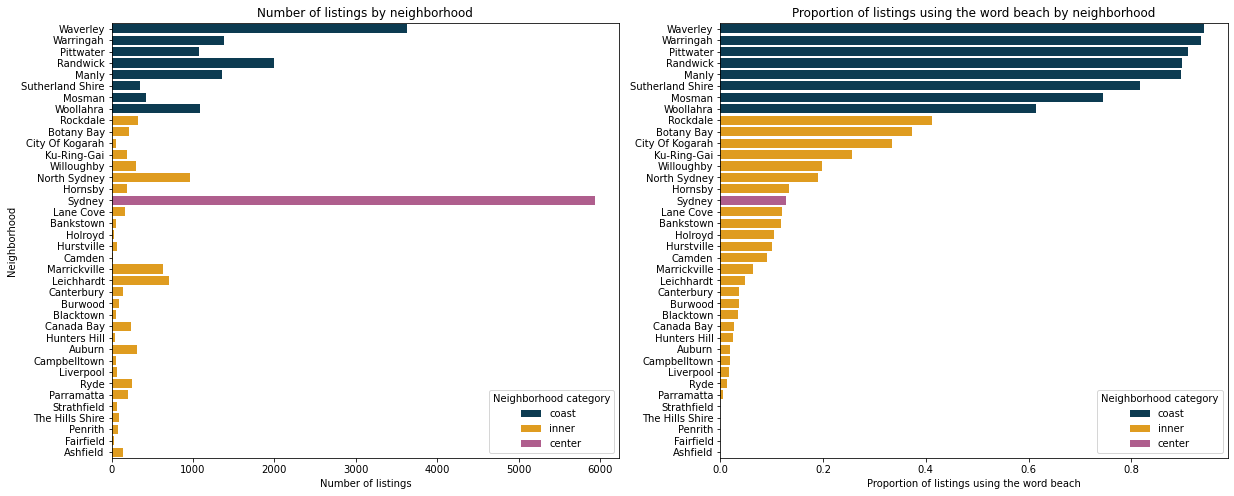

In [8]:
colors = ['#003f5c', '#ffa600', '#bc5090']
custom_palette = sns.set_palette(sns.color_palette(colors))

fig, ax = plt.subplots(1, 2, sharey=False, figsize=(20,8))
sns.barplot(ax = ax[1],
            y='neighborhood',
            x='proportion_beach',
            hue='category_beach',
            palette=custom_palette,
            dodge=False,
            data=beach_neighborhood)
ax[1].set(xlabel = 'Proportion of listings using the word beach',
          ylabel = '',
          title = 'Proportion of listings using the word beach by neighborhood')
ax[1].legend(loc='lower right', title='Neighborhood category')

sns.set_palette(sns.color_palette(colors))

sns.barplot(ax = ax[0],
            y='neighborhood',
            x='total_listings',
            hue='category_beach',
            palette=custom_palette,
            dodge=False,
            data=beach_neighborhood)
ax[0].set(xlabel = 'Number of listings',
          ylabel = 'Neighborhood',
          title = 'Number of listings by neighborhood')
ax[0].legend(loc='lower right', title='Neighborhood category')

fig.show()

plt.savefig('fig_1.png', bbox_inches='tight', dpi=300);

## Is there a difference in the size of places listed for each neighborhood category?

In [9]:
#filters only entire homes/apts
key_listings2 = pd.merge(key_listings, beach_neighborhood, how='left', on=['neighborhood'])
#key_listings2 = key_listings2[key_listings2['room_type'] == 'Entire home/apt']


listings_beach_bedrooms = key_listings2.groupby(['category_beach', 'bedrooms']).count()
proportions_bedrooms = (listings_beach_bedrooms / listings_beach_bedrooms.groupby(level=[0]).transform('sum')).reset_index()
proportions_bedrooms['bedrooms'] = proportions_bedrooms['bedrooms'].astype('int64')
proportions_bedrooms = proportions_bedrooms[proportions_bedrooms['bedrooms'] < 10]

listings_beach_accommodates = key_listings2.groupby(['category_beach', 'accommodates']).count()
proportions_accommodates = (listings_beach_accommodates / listings_beach_accommodates.groupby(level=[0]).transform('sum')).reset_index()
proportions_accommodates = proportions_accommodates[proportions_accommodates['accommodates'] < 20]


<ipython-input-10-17b31afe28c9>:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


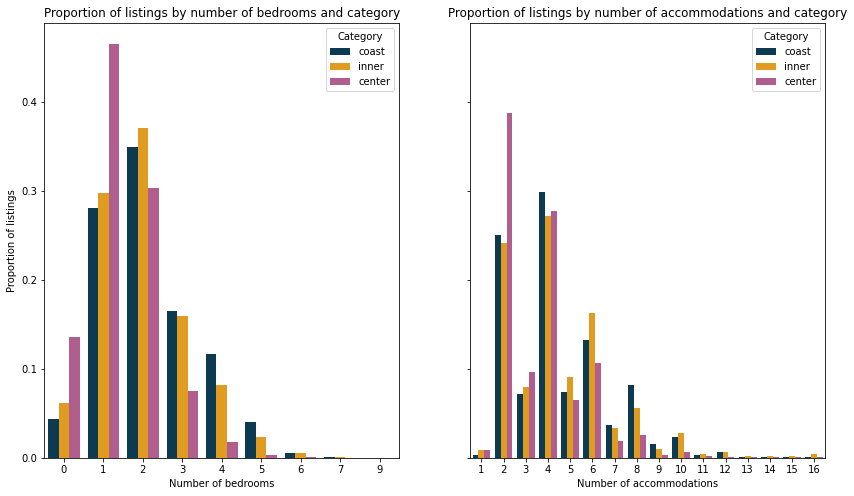

In [10]:
colors = ['#003f5c', '#ffa600', '#bc5090']
custom_palette = sns.set_palette(sns.color_palette(colors))

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(14,8))
sns.barplot(ax = ax[0],
            data=proportions_bedrooms,
            y='id',
            x='bedrooms',
            hue='category_beach',
            hue_order = ['coast', 'inner', 'center'])
ax[0].set(xlabel = 'Number of bedrooms',
          ylabel = 'Proportion of listings',
          title = 'Proportion of listings by number of bedrooms and category')
ax[0].legend(loc='upper right', title='Category')

sns.set_palette(sns.color_palette(colors))

sns.barplot(ax = ax[1],
            data=proportions_accommodates,
            y='id',
            x='accommodates',
            hue='category_beach',
            hue_order = ['coast', 'inner', 'center'])
ax[1].set(xlabel = 'Number of accommodations',
          ylabel = '',
          title = 'Proportion of listings by number of accommodations and category')
ax[1].legend(loc='upper right', title='Category')

fig.show()

plt.savefig('fig_2.png', bbox_inches='tight', dpi=300);

## Does listing price change according to neighborhood category?

In [11]:
price_bedroom = key_listings2.groupby(['category_beach', 'bedrooms'], as_index=False).mean()[['category_beach', 'bedrooms', 'price']]

price_accommodates = key_listings2.groupby(['category_beach', 'accommodates'], as_index=False).mean()[['category_beach', 'accommodates', 'price']]


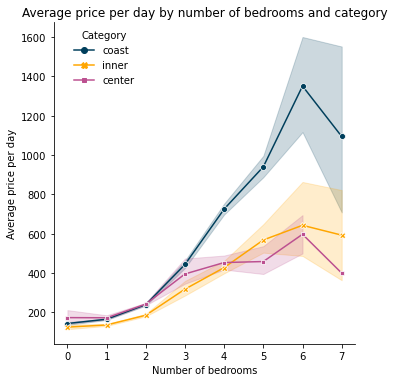

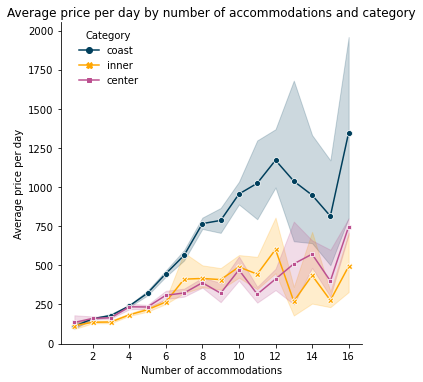

In [12]:
g1 = sns.relplot(data=key_listings2[key_listings2['bedrooms'] < 9],
            y='price',
            x='bedrooms',
            style = 'category_beach',
            hue='category_beach',
            hue_order = ['coast', 'inner', 'center'],
            kind='line',
            markers=True,
            dashes=False)
g1.set(xlabel = 'Number of bedrooms',
          ylabel = 'Average price per day',
          title = 'Average price per day by number of bedrooms and category')
g1._legend.set_title('Category')
leg1 = g1._legend
leg1.set_bbox_to_anchor([0.32, 0.9])  # coordinates of lower left of bounding box

plt.savefig('fig_3.png', bbox_inches='tight', dpi=300)

g2 = sns.relplot(data=key_listings2[key_listings2['accommodates'] < 20],
            y='price',
            x='accommodates',
            style = 'category_beach',
            hue='category_beach',
            hue_order = ['coast', 'inner', 'center'],
            kind='line',
            markers=True,
            dashes=False)
g2.set(xlabel = 'Number of accommodations',
           ylabel = 'Average price per day',
          title = 'Average price per day by number of accommodations and category')
g2._legend.set_title('Category')
leg2 = g2._legend
leg2.set_bbox_to_anchor([0.33, 0.9])  # coordinates of lower left of bounding box

plt.savefig('fig_4.png', bbox_inches='tight', dpi=300);

In [13]:
key_listings2.groupby(['category_beach']).mean()

,id,price,accommodates,bedrooms,beach_x,beach_y,not_beach,total_listings,proportion_beach
category_beach,,,,,,,,,
center,1.903001e+07,217.013473,3.648703,1.388178,0.126979,754.000000,5184.000000,5938.000000,0.126979
coast,1.697086e+07,339.694920,4.521057,2.175813,0.882082,1894.566806,187.868605,2082.435411,0.882082
inner,1.962625e+07,220.681635,4.548676,2.004385,0.119453,57.071917,380.520610,437.592528,0.119453


In [14]:
# Linear regression
#Split into explanatory and response variables
y = key_listings2['price']
X = key_listings2[['category_beach', 'bedrooms', 'accommodates']]

cat_names = list(X.select_dtypes(include = "object").columns)
    
for focal_col in cat_names:
    try:
        X = pd.concat([X.drop([focal_col], axis = 1),
                       pd.get_dummies(X[focal_col],
                                      dummy_na = False,
                                      drop_first = True,
                                      prefix = focal_col,
                                      prefix_sep = "_")],
                      axis = 1)
    except:
        continue


#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)
       
#Predict and score the model
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

y_test_preds = lm_model.predict(X_test) 

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds) #r2_score
length_y_test = len(y_test) #num in y_test

"The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test)

coefs_df = pd.DataFrame()
coefs_df['est_int'] = X_train.columns
coefs_df['coefs'] = lm_model.coef_
coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
coefs_df

LinearRegression(normalize=True)

'The r-squared score for your model was 0.26026342953375814 on 6876 values.'

,est_int,coefs,abs_coefs
0,bedrooms,89.489677,89.489677
3,category_beach_inner,-73.861232,73.861232
1,accommodates,28.903571,28.903571
2,category_beach_coast,27.191672,27.191672


## Does availability differ from winter to season depending on neighboor category?

In [15]:
#joining info from key_listings2 to calendar
joined_calendar = pd.merge(calendar, key_listings2[['id', 'category_beach', 'bedrooms', 'accommodates']], on=['id'])

#grouping by season and id to get availability in each
available_season = joined_calendar.groupby(['id', 'season'], as_index=False).sum()[['id', 'season', 'available']]
available_season = pd.merge(available_season, joined_calendar[['id', 'category_beach', 'bedrooms', 'accommodates']], on=['id']).drop_duplicates()

#we want to compare summer with winter
available_season = available_season[available_season['season'].isin(['summer', 'winter'])]

#pivotting
pivot_season = available_season.pivot(index = ['id', 'category_beach', 'bedrooms', 'accommodates'], columns = 'season', values = 'available')
pivot_season.reset_index(inplace=True)

#making proportions
pivot_season['summer_prop'] = pivot_season['summer']/90 #number of summer days
pivot_season['winter_prop'] = pivot_season['winter']/92 #number of winter days
pivot_season['delta_prop'] = pivot_season['summer_prop'] - pivot_season['winter_prop']

pivot_season.head()

season,id,category_beach,bedrooms,accommodates,summer,winter,summer_prop,winter_prop,delta_prop
0,14250,coast,3.0,6,46,92,0.511111,1.000000,-0.488889
1,20865,inner,4.0,8,23,4,0.255556,0.043478,0.212077
2,38073,inner,0.0,2,46,92,0.511111,1.000000,-0.488889
3,39348,coast,1.0,2,13,90,0.144444,0.978261,-0.833816
4,44545,center,1.0,2,1,0,0.011111,0.000000,0.011111


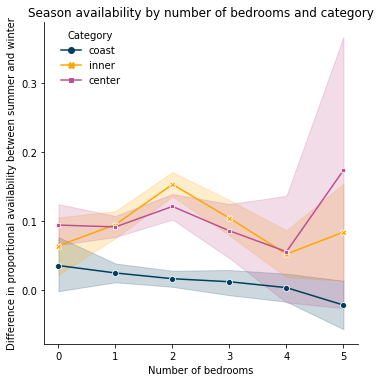

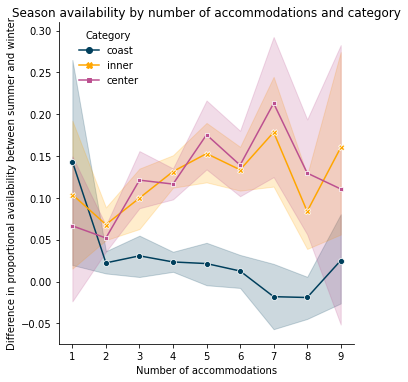

In [16]:
g3 = sns.relplot(data=pivot_season[pivot_season['bedrooms'] < 6],
            y='delta_prop',
            x='bedrooms',
            style ='category_beach',
            hue='category_beach',
            hue_order = ['coast', 'inner', 'center'],
            kind='line',
            markers=True,
            dashes=False)
g3.set(xlabel = 'Number of bedrooms',
          ylabel = 'Difference in proportional availability between summer and winter',
          title = 'Season availability by number of bedrooms and category')
g3._legend.set_title('Category')
leg3 = g3._legend
leg3.set_bbox_to_anchor([0.29, 0.9])  # coordinates of lower left of bounding box

plt.savefig('fig_5.png', bbox_inches='tight', dpi=300);

g4 = sns.relplot(data=pivot_season[pivot_season['accommodates'] < 10],
            y='delta_prop',
            x='accommodates',
            style ='category_beach',
            hue='category_beach',
            hue_order = ['coast', 'inner', 'center'],
            kind='line',
            markers=True,
            dashes=False)
g4.set(xlabel = 'Number of accommodations',
          ylabel = 'Difference in proportional availability between summer and winter',
          title = 'Season availability by number of accommodations and category');
g4._legend.set_title('Category')
leg4 = g4._legend
leg4.set_bbox_to_anchor([0.33, 0.9])  # coordinates of lower left of bounding box

plt.savefig('fig_6.png', bbox_inches='tight', dpi=300);

In [17]:
pivot_season.groupby(['category_beach']).mean()

season,id,bedrooms,accommodates,summer,winter,summer_prop,winter_prop,delta_prop
category_beach,,,,,,,,
center,1.903001e+07,1.388178,3.648703,29.576794,21.046986,0.328631,0.228772,0.099859
coast,1.697129e+07,2.175740,4.520837,23.438287,22.603742,0.260425,0.245693,0.014733
inner,1.962625e+07,2.004385,4.548676,32.801263,23.245922,0.364458,0.252673,0.111785


In [18]:
# Linear regression
#Split into explanatory and response variables
y = pivot_season['delta_prop']
X = pivot_season[['category_beach', 'bedrooms', 'accommodates']]

cat_names = list(X.select_dtypes(include = "object").columns)
    
for focal_col in cat_names:
    try:
        X = pd.concat([X.drop([focal_col], axis = 1),
                       pd.get_dummies(X[focal_col],
                                      dummy_na = False,
                                      drop_first = True,
                                      prefix = focal_col,
                                      prefix_sep = "_")],
                      axis = 1)
    except:
        continue


#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)
       
#Predict and score the model
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

y_test_preds = lm_model.predict(X_test) 

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds) #r2_score
length_y_test = len(y_test) #num in y_test

"The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test)

coefs_df = pd.DataFrame()
coefs_df['est_int'] = X_train.columns
coefs_df['coefs'] = lm_model.coef_
coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
coefs_df

LinearRegression(normalize=True)

'The r-squared score for your model was 0.0143281068771125 on 6876 values.'

,est_int,coefs,abs_coefs
2,category_beach_coast,-0.069463,0.069463
3,category_beach_inner,0.025472,0.025472
0,bedrooms,-0.022537,0.022537
1,accommodates,0.010375,0.010375
